<a href="https://colab.research.google.com/github/1Kote/reconhecimento_facial_IA/blob/daniel/reconhecimento_facial_EigenFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconhecimento facial - Estudo e Trabalho do Dimmy

Bibliotecas para serem importadas

In [ ]:
import cv2, zipfile, os
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
#extrair o zip com o dataset
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/yalefaces.zip' mode='r'>>

In [ ]:
print(os.listdir('/content/yalefaces/train'))

['subject02.sad.gif', 'subject04.normal.gif', 'subject15.noglasses.gif', 'subject06.surprised.gif', 'subject06.sleepy.gif', 'subject06.wink.gif', 'subject03.normal.gif', 'subject14.sleepy.gif', 'subject15.happy.gif', 'subject07.glasses.gif', 'subject09.normal.gif', 'subject03.surprised.gif', 'subject13.noglasses.gif', 'subject03.centerlight.gif', 'subject04.glasses.gif', 'subject02.glasses.gif', 'subject15.centerlight.gif', 'subject01.glasses.gif', 'subject03.happy.gif', 'subject04.noglasses.gif', 'subject05.sad.gif', 'subject14.leftlight.gif', 'subject14.rightlight.gif', 'subject08.noglasses.gif', 'subject09.happy.gif', 'subject12.sad.gif', 'subject10.glasses.gif', 'subject07.normal.gif', 'subject13.leftlight.gif', 'subject10.normal.gif', 'subject13.happy.gif', 'subject12.glasses.gif', 'subject12.noglasses.gif', 'subject15.wink.gif', 'subject01.sad.gif', 'subject08.happy.gif', 'subject15.normal.gif', 'subject12.happy.gif', 'subject08.leftlight.gif', 'subject07.noglasses.gif', 'subject

In [ ]:
test_image = '/content/yalefaces/train/subject01.leftlight.gif'
image = Image.open(test_image).convert('L')
type(image)

PIL.Image.Image

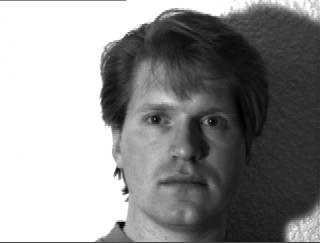

In [ ]:
image

conversão de PIL para numpy

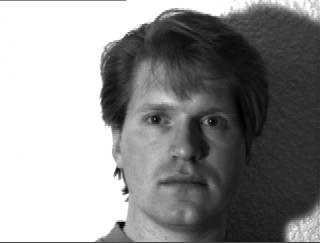

(243, 320)


In [ ]:
image_np = np.array(image, "uint8")
cv2_imshow(image_np)
print(image_np.shape)

Numero de pixels

In [ ]:
243 * 320

In [ ]:
#criação da rede neural
network = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt', '/content/res10_300x300_ssd_iter_140000.caffemodel')

In [ ]:
#coversão de formato de escala cinza para BGR. A imagem continuará cinza mas isso é nessario para manter os canais de cores(Blue, Green, Red)
image = cv2.cvtColor(image_np, cv2.COLOR_GRAY2BGR)
#Altura e largura da imagem(width e height)
(h, w) = image.shape[:2]
#Conversão para o formato blob e redimencionamento da imagem em 100x100.
blob = cv2.dnn.blobFromImage(cv2.resize(image, (100, 100)), 1.0, (100, 100), (104.0, 177.0, 123.0))
#Adicionando a imagem na camada de entrada da rede neural
network.setInput(blob)
#Retornando as detecções
detections = network.forward()

In [ ]:
conf_min = 0.7
#realizando uma copia da imagem original
image_cp = image.copy()
#percorrendo os resultados
for i in range(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
#Verificando a confiança
  if confidence > conf_min:
#extração do bound in box(bbox)
    bbox = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (start_x, start_y, end_x, end_y) = bbox.astype("int")
#roi que significa "region of interest" que recebe como parametro as informações do bbox, start_y, end_y, start_x, end_x.
    roi = image_cp[start_y:end_y, start_x:end_x]
#a variavel "text" armazena o valor do intevalo de confiança
    text = "{:.2f}%".format(confidence * 100)
#Colocando o texto que equivale a confiança na imagem
    cv2.putText(image, text, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
#desenhando o retangulo
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print(image.shape)
#o output mostra a imagem com um retangulo que correponde a área da face com intervalo de confiança de 99.96%